### 任务描述

1.掌握逻辑回归的基本概念。

2.运用逻辑回归解决实际问题。

### 相关知识

**逻辑回归**也被称为广义线性回归模型，它与线性回归模型的形式基本上相同，最大的区别在于它们的因变量不同，如果是连续的，就是多重线性回归；如果是二项分布，就是Logistic回归。

逻辑回归的**用途**主要有以下3个方面：

1.寻找危险因素；寻找某一疾病的危险因素等；

2.预测：根据模型，预测在不同的自变量情况下，发生某种疾病或某种情况的概率有多大；

3.判别：实际上跟预测有些类似，也是根据模型，判断某人属于某种疾病或属于某种情况的概率有多大。

**逻辑回归的常规步骤**

1.寻找$h$函数（即预测函数）

2.构造$J$函数（损失函数）

3.想办法使得$J$函数最小并求得回归参数（$θ$）

下面我们通过**环境数据检测异常分析与预测**这个实验，对逻辑回归进行具体的实现及应用。

首先读取数据

In [2]:
from numpy import *
import pandas as pd
from pandas import DataFrame
filename='./data.txt' #文件目录
#df = DataFrame(pd.read_csv('/Users/apple27/Documents/logi.csv'))
def loadDataSet():   #读取数据（这里只有两个特征）
    df=pd.read_csv(filename)
    print(df)
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])  #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat
loadDataSet()

    -0.017612   14.053064   0
0   -1.395634   4.662541    1
1   -0.752157   6.538620    0
2   -1.322371   7.152853    0
3   0.423363    11.054677   0
4   0.406704    7.067335    1
..                        ...
94  0.677983    2.556666    1
95  0.761349    10.693862   0
96  -2.168791   0.143632    1
97  1.388610    9.341997    0
98  0.317029    14.739025   0

[99 rows x 1 columns]


([[1.0, -0.017612, 14.053064],
  [1.0, -1.395634, 4.662541],
  [1.0, -0.752157, 6.53862],
  [1.0, -1.322371, 7.152853],
  [1.0, 0.423363, 11.054677],
  [1.0, 0.406704, 7.067335],
  [1.0, 0.667394, 12.741452],
  [1.0, -2.46015, 6.866805],
  [1.0, 0.569411, 9.548755],
  [1.0, -0.026632, 10.427743],
  [1.0, 0.850433, 6.920334],
  [1.0, 1.347183, 13.1755],
  [1.0, 1.176813, 3.16702],
  [1.0, -1.781871, 9.097953],
  [1.0, -0.566606, 5.749003],
  [1.0, 0.931635, 1.589505],
  [1.0, -0.024205, 6.151823],
  [1.0, -0.036453, 2.690988],
  [1.0, -0.196949, 0.444165],
  [1.0, 1.014459, 5.754399],
  [1.0, 1.985298, 3.230619],
  [1.0, -1.693453, -0.55754],
  [1.0, -0.576525, 11.778922],
  [1.0, -0.346811, -1.67873],
  [1.0, -2.124484, 2.672471],
  [1.0, 1.217916, 9.597015],
  [1.0, -0.733928, 9.098687],
  [1.0, -3.642001, -1.618087],
  [1.0, 0.315985, 3.523953],
  [1.0, 1.416614, 9.619232],
  [1.0, -0.386323, 3.989286],
  [1.0, 0.556921, 8.294984],
  [1.0, 1.224863, 11.58736],
  [1.0, -1.347803, -2.4

sigmoid函数

In [3]:
def sigmoid(inX):  #sigmoid函数
    return 1.0/(1+exp(-inX))

改进版随机梯度上升，在每次迭代中随机选择样本来更新权重，并且随迭代次数增加，，权重变化越小。

In [4]:
def stocGradAscent1(dataMat, labelMat): #改进版随机梯度上升，在每次迭代中随机选择样本来更新权重，并且随迭代次数增加，权重变化越小。
    dataMatrix=mat(dataMat)
    classLabels=labelMat
    m,n=shape(dataMatrix)
    weights=ones((n,1))
    maxCycles=500
    for j in range(maxCycles): #迭代
        dataIndex=[i for i in range(m)]
        for i in range(m): #随机遍历每一行
            alpha=4/(1+j+i)+0.0001  #随迭代次数增加，权重变化越小。
            randIndex=int(random.uniform(0,len(dataIndex)))  #随机抽样
            h=sigmoid(sum(dataMatrix[randIndex]*weights))
            error=classLabels[randIndex]-h
            weights=weights+alpha*error*dataMatrix[randIndex].transpose()
            del(dataIndex[randIndex]) #去除已经抽取的样本
    return weights


画出最终分类的图

    -0.017612   14.053064   0
0   -1.395634   4.662541    1
1   -0.752157   6.538620    0
2   -1.322371   7.152853    0
3   0.423363    11.054677   0
4   0.406704    7.067335    1
..                        ...
94  0.677983    2.556666    1
95  0.761349    10.693862   0
96  -2.168791   0.143632    1
97  1.388610    9.341997    0
98  0.317029    14.739025   0

[99 rows x 1 columns]
    -0.017612   14.053064   0
0   -1.395634   4.662541    1
1   -0.752157   6.538620    0
2   -1.322371   7.152853    0
3   0.423363    11.054677   0
4   0.406704    7.067335    1
..                        ...
94  0.677983    2.556666    1
95  0.761349    10.693862   0
96  -2.168791   0.143632    1
97  1.388610    9.341997    0
98  0.317029    14.739025   0

[99 rows x 1 columns]


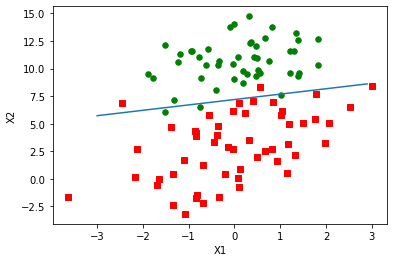

<Figure size 432x288 with 0 Axes>

In [8]:
def plotBestFit(weights):  #画出最终分类的图
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    plt.savefig('logExample.png', format='png')
def main():
    datamat,labelmat=loadDataSet()
    weights=stocGradAscent1(datamat, labelmat).getA()
    plotBestFit(weights)

if __name__=='__main__':
    main()


### 编程要求

复习逻辑回归的基本原理与概念，编程实现基于逻辑回归的环境检测数据异常分析与预测实验。

### 参考答案

In [ ]:
# -*- coding: utf-8 -*-
from numpy import *
import pandas as pd
from pandas import DataFrame
filename='./data.txt' #文件目录
#df = DataFrame(pd.read_csv('/Users/apple27/Documents/logi.csv'))
def loadDataSet():   #读取数据（这里只有两个特征）
    df=pd.read_csv(filename)
    print(df)
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])  #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

loadDataSet()
def sigmoid(inX):  #sigmoid函数
    return 1.0/(1+exp(-inX))

def stocGradAscent1(dataMat, labelMat): #改进版随机梯度上升，在每次迭代中随机选择样本来更新权重，并且随迭代次数增加，权重变化越小。
    dataMatrix=mat(dataMat)
    classLabels=labelMat
    m,n=shape(dataMatrix)
    weights=ones((n,1))
    maxCycles=500
    for j in range(maxCycles): #迭代
        dataIndex=[i for i in range(m)]
        for i in range(m): #随机遍历每一行
            alpha=4/(1+j+i)+0.0001  #随迭代次数增加，权重变化越小。
            randIndex=int(random.uniform(0,len(dataIndex)))  #随机抽样
            h=sigmoid(sum(dataMatrix[randIndex]*weights))
            error=classLabels[randIndex]-h
            weights=weights+alpha*error*dataMatrix[randIndex].transpose()
            del(dataIndex[randIndex]) #去除已经抽取的样本
    return weights

def plotBestFit(weights):  #画出最终分类的图
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    plt.savefig('logExample.png', format='png')
def main():
    datamat,labelmat=loadDataSet()
    weights=stocGradAscent1(datamat, labelmat).getA()
    plotBestFit(weights)

if __name__=='__main__':
    main()


from numpy import *
import matplotlib.pyplot as plt


def sigmoid(X):
    return 1.0 / (1 + exp(-X))


class logRegressClassifier(object):

    def __init__(self):
        self.dataMat = list()
        self.labelMat = list()
        self.weights = list()

    def loadDataSet(self, filename):
        fr = open(filename)
        for line in fr.readlines():
            lineArr = line.strip().split()
            dataLine = [1.0]
            for i in lineArr:
                dataLine.append(float(i))
            label = dataLine.pop()  # pop the last column referring to  label
            self.dataMat.append(dataLine)
            self.labelMat.append(int(label))
        self.dataMat = mat(self.dataMat)
        self.labelMat = mat(self.labelMat).transpose()

    def train(self):
        self.weights = self.stocGradAscent1()

    def batchGradAscent(self):
        m, n = shape(self.dataMat)
        alpha = 0.001
        maxCycles = 500
        weights = ones((n, 1))
        for k in range(maxCycles):  # heavy on matrix operations
            h = sigmoid(self.dataMat * weights)  # matrix mult
            error = (self.labelMat - h)  # vector subtraction
            weights += alpha * self.dataMat.transpose() * error  # matrix mult
        return weights

    def stocGradAscent1(self):
        m, n = shape(self.dataMat)
        alpha = 0.01
        weights = ones((n, 1))  # initialize to all ones
        for i in range(m):
            h = sigmoid(sum(self.dataMat[i] * weights))
            error = self.labelMat[i] - h
            weights += (alpha * error * self.dataMat[i]).transpose()
        return weights

    def stocGradAscent2(self):
        numIter = 2
        m, n = shape(self.dataMat)
        weights = ones((n, 1))  # initialize to all ones
        for j in range(numIter):
            dataIndex = range(m)
            for i in range(m):
                alpha = 4 / (1.0 + j + i) + 0.0001  # apha decreases with iteration, does not
                randIndex = int(random.uniform(0, len(dataIndex)))  # go to 0 because of the constant
                h = sigmoid(sum(self.dataMat[randIndex] * weights))
                error = self.labelMat[randIndex] - h
                weights += (alpha * error * self.dataMat[randIndex]).transpose()
                del (dataIndex[randIndex])
        return weights

    def classify(self, X):
        prob = sigmoid(sum(X * self.weights))
        if prob > 0.5:
            return 1.0
        else:
            return 0.0

if __name__ == '__main__':
    lr = logRegressClassifier()